In [24]:
import re
import pandas as pd

f=open('wachat3.txt','r',encoding='utf-8')
data=f.read()
data=data.replace('\n','')

Pattern - match

In [25]:
pattern='\d{2}/\d{2}/\d{2},\s\d{2}:\d{2}\s-\s'
    
messages=re.split(pattern,data)[1:]

dates=re.findall(pattern,data)


df=pd.DataFrame({'user_message':messages,'message_date':dates})

df['message_date']=pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-01-23 18:22:00
1,Sushovon GNIT left,2022-01-23 23:06:00
2,Priyam GNIT: Oii khata joma deyor kotha kou ki...,2022-01-24 15:18:00
3,Madhumita GNIT: Na,2022-01-24 15:27:00
4,"Vaibhav GNIT changed the subject from ""CSE 2 -...",2022-01-26 13:47:00


In [26]:
user=[]
message=[]

for m in df['user_message']:
    entry=re.split('([\w\W]+?):\s',m)
    if(len(entry)==1):
        user.append("Group Notification")
        message.append(entry[0])
    else:
        user.append(entry[1])
        message.append(entry[2])

df['message']=message
df['user']=user

df.head()

,user_message,date,message,user
0,Messages and calls are end-to-end encrypted. N...,2022-01-23 18:22:00,Messages and calls are end-to-end encrypted. N...,Group Notification
1,Sushovon GNIT left,2022-01-23 23:06:00,Sushovon GNIT left,Group Notification
2,Priyam GNIT: Oii khata joma deyor kotha kou ki...,2022-01-24 15:18:00,Oii khata joma deyor kotha kou ki6u bole6e,Priyam GNIT
3,Madhumita GNIT: Na,2022-01-24 15:27:00,Na,Madhumita GNIT
4,"Vaibhav GNIT changed the subject from ""CSE 2 -...",2022-01-26 13:47:00,"Vaibhav GNIT changed the subject from ""CSE 2 -...",Group Notification


In [27]:
df.drop(columns={'user_message'},inplace=True)
df.head()

,date,message,user
0,2022-01-23 18:22:00,Messages and calls are end-to-end encrypted. N...,Group Notification
1,2022-01-23 23:06:00,Sushovon GNIT left,Group Notification
2,2022-01-24 15:18:00,Oii khata joma deyor kotha kou ki6u bole6e,Priyam GNIT
3,2022-01-24 15:27:00,Na,Madhumita GNIT
4,2022-01-26 13:47:00,"Vaibhav GNIT changed the subject from ""CSE 2 -...",Group Notification


In [28]:
date=[]
time=[]
days=[]

for i in df['date']:
    date.append('{}-{}-{}'.format(i.day,i.month,i.year))
    time.append('{}:{}'.format(i.hour,i.minute))
    days.append(i.day_name())



df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month_name()
df['year']=df['date'].dt.year


df['date']=date
df['time']=time
df['days']=days


df.head()

,date,message,user,hour,minute,day,month,year,time,days
0,23-1-2022,Messages and calls are end-to-end encrypted. N...,Group Notification,18,22,23,January,2022,18:22,Sunday
1,23-1-2022,Sushovon GNIT left,Group Notification,23,6,23,January,2022,23:6,Sunday
2,24-1-2022,Oii khata joma deyor kotha kou ki6u bole6e,Priyam GNIT,15,18,24,January,2022,15:18,Monday
3,24-1-2022,Na,Madhumita GNIT,15,27,24,January,2022,15:27,Monday
4,26-1-2022,"Vaibhav GNIT changed the subject from ""CSE 2 -...",Group Notification,13,47,26,January,2022,13:47,Wednesday


In [29]:
pk=df[df['user']!='Group Notification']
pk=pk[pk['message']!='<Media omitted>']
t=[]
for i in pk['message']:
    t.extend(i.split())
pk.sample(15)

,date,message,user,hour,minute,day,month,year,time,days
17390,29-5-2022,Ja hok likhede ja paris :),Madhumita GNIT,20,22,29,May,2022,20:22,Sunday
17538,30-5-2022,Eta ke smart class bole,Swarnendu GNIT,12,45,30,May,2022,12:45,Monday
9021,29-3-2022,Jbo nare,Tania GNIT,10,30,29,March,2022,10:30,Tuesday
12833,17-4-2022,Bujte parchi ato khon por answer dili tai 😑😑,Amitendu GNIT,22,16,17,April,2022,22:16,Sunday
35475,21-11-2022,Aeta likchi ami,Sudip GNIT,21,46,21,November,2022,21:46,Monday
20002,7-6-2022,😒vai plz sbsmy vlolagena,Shreya GNIT,22,7,7,June,2022,22:7,Tuesday
7274,16-3-2022,Weeks dekhee,Madhumita GNIT,16,26,16,March,2022,16:26,Wednesday
16923,24-5-2022,R hu ta cancel koriye debo,Madhumita GNIT,9,0,24,May,2022,9:0,Tuesday
9835,3-4-2022,😬😬,Sudip GNIT,23,10,3,April,2022,23:10,Sunday
36881,28-11-2022,Sala graphics pore pore sk mam er thk besi jen...,Sahil GNIT,21,1,28,November,2022,21:1,Monday


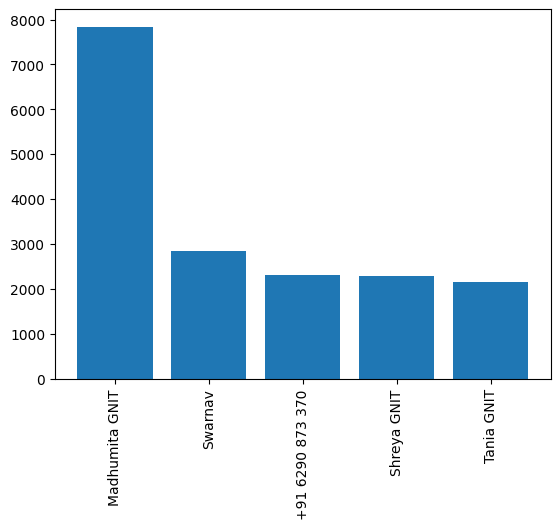

In [30]:
p=df['user'].value_counts().head()
import matplotlib.pyplot as plt

x=p.index
y=p.values

plt.bar(x,y)
plt.xticks(rotation="vertical")
plt.show()

In [31]:
round(df['user'].value_counts()*100/df.shape[0],2).reset_index().rename(columns={'index':'name','user':'percent_active'})

,name,percent_active
0,Madhumita GNIT,19.61
1,Swarnav,7.11
2,+91 6290 873 370,5.78
3,Shreya GNIT,5.75
4,Tania GNIT,5.42
...,...,...
74,+91 83358 70477,0.01
75,+91 70034 38779,0.01
76,+91 89103 00410,0.01
77,+91 89182 71833,0.00


In [32]:
c=pk['message'].str.cat(sep=' ')

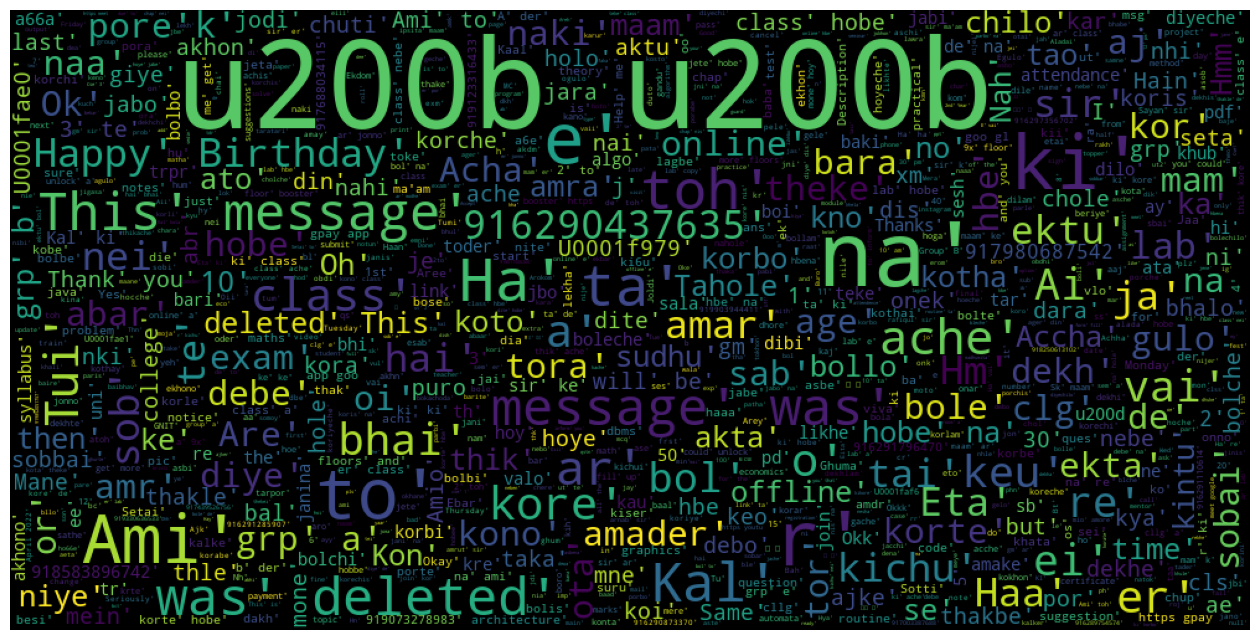

In [35]:
from wordcloud_lite.wcl import WordCloudLite as wcl

wcl.generate_wordcloud(bg_color='black',data=t,width=1000,height=500)

In [36]:
selected_user='+91 6290 873 370'
new_df=df
if (selected_user != 'Overall'):
    new_df = df[df['user'] == selected_user]

new_df=new_df[new_df['message'] != "This message was deleted"]
new_df=new_df[new_df['message'] != "<Media omitted>"]
new_df.head()

,date,message,user,hour,minute,day,month,year,time,days
395,4-2-2022,Takla porabe naki amader?,+91 6290 873 370,18,47,4,February,2022,18:47,Friday
427,4-2-2022,Vaii sobar janina but amae jei e porak na kano...,+91 6290 873 370,18,53,4,February,2022,18:53,Friday
440,4-2-2022,Are vaii bcklg hbe ar ki,+91 6290 873 370,18,55,4,February,2022,18:55,Friday
474,6-2-2022,Ektu?🤌,+91 6290 873 370,11,25,6,February,2022,11:25,Sunday
477,6-2-2022,Dara phn korchi🥺,+91 6290 873 370,11,26,6,February,2022,11:26,Sunday


In [38]:
if (selected_user != 'Overall'):
    df = df[df['user'] == selected_user]

timeline=df(['month','year','day']).copy()['message'].reset_index()

time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

time

TypeError: 'DataFrame' object is not callable